In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<hr>

# Ex. 1


## Drawing random numbers

In [6]:
import numpy as np

# Global random state for all numpy functions
np.random.seed(1986) 

# Get a random state for the 'local' numpy method in this case .uniform()
state = np.random.get_state()
for i in range(3):
    np.random.set_state(state)
    # Try '#'-ing the above statement
    for j in range(2):
        x = np.random.uniform()
        print(f'({i},{j}): x = {x:.3f}')

# Each time the you load the state you return to the same point in the distribution of .uniform()

(0,0): x = 0.569
(0,1): x = 0.077
(1,0): x = 0.569
(1,1): x = 0.077
(2,0): x = 0.569
(2,1): x = 0.077


<hr>

# Ex.2  

## Find the expectated value

Find the expected value and the expected variance

$$ 
\mathbb{E}[g(x)] \approx \frac{1}{N}\sum_{i=1}^{N} g(x_i
$$
$$ 
\mathbb{VAR}[g(x)] \approx \frac{1}{N}\sum_{i=1}^{N} \left( g(x_i) - \frac{1}{N}\sum_{i=1}^{N} g(x_i) \right)^2
$$

where $ x_i \sim \mathcal{N}(0,\sigma) $ and

$$ 
g(x,\omega)=\begin{cases}
x & \text{if }x\in[-\omega,\omega]\\
-\omega & \text{if }x<-\omega\\
\omega & \text{if }x>\omega
\end{cases} 
$$

In [7]:
sigma = 3.14
omega = 2
N = 10000
np.random.seed(1986)

# Draw random numbers
x = np.random.normal(loc=0,scale=sigma,size=N)

# Create g(x,omega)
def g(x,omega):
    # Copy distribution
    y = x.copy()
    # Overwrite data given condition
    y[x < -omega] = -omega
    y[x > omega] = omega
    return y

# Mean and variance from numpy
mean = np.mean(g(x,omega))
var = np.var(g(x-mean,omega))
print(f'mean = {mean:.5f}, var = {var:.5f}')

mean = -0.00264, var = 2.69804


<hr>

# Ex. 3

## Interactive histogram

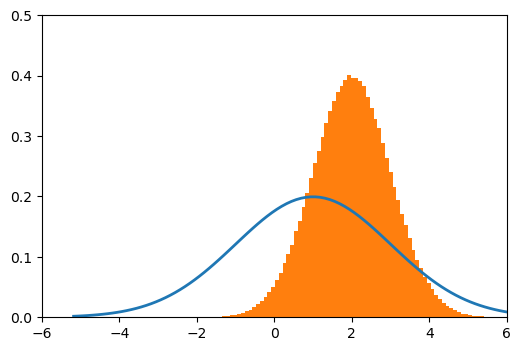

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm

# PLotting function
def fitting_normal(X,mu_guess,sigma_guess):
    
    # Normal distribution given guess
    F = norm(loc=mu_guess,scale=sigma_guess)
    
    # The norm function has the method ppf()
    x_low = F.ppf(0.001) # x value where cdf is 0.001
    x_high = F.ppf(0.999) # x value where cdf is 0.999
    
    # Vector of evenly spaced values
    x = np.linspace(x_low,x_high,100)

    # Figure
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    
    # Plot the guess
    ax.plot(x,F.pdf(x),lw=2)
    
    # Plot the true
    ax.hist(X,bins=100,density=True,histtype='stepfilled');
    ax.set_ylim([0,0.5])
    ax.set_xlim([-6,6])

# Parameters
mu_true = 2
sigma_true = 1
mu_guess = 1
sigma_guess = 2

# Test the figure
X = np.random.normal(loc=mu_true,scale=sigma_true,size=10**6)
fitting_normal(X,mu_guess,sigma_guess)

In [9]:
import ipywidgets as widgets
widgets.interact(fitting_normal,
    X=widgets.fixed(X),
    mu_guess=widgets.FloatSlider(description="$\mu$", min=0.1, max=5, step=0.05, value=1),
    sigma_guess=widgets.FloatSlider(description="$\sigma$", min=0.1, max=5, step=0.05, value=1)
);

interactive(children=(FloatSlider(value=1.0, description='$\\mu$', max=5.0, min=0.1, step=0.05), FloatSlider(v…

<hr>

# Ex. 4

## Save and load

Consider the code below and fill in the missing lines so the code can run without any errors.

In [10]:
import pickle

# Create some data in some dicts
my_data = {}
my_data['A'] = {'a':1,'b':2}
my_data['B'] = np.array([1,2,3])

# Insert random data
my_data['C'] = (1,4,2)

my_np_data = {}
my_np_data['D'] = np.array([1,2,3])
my_np_data['E'] = np.zeros((5,8))

# Insert random numpy data
my_np_data['F'] = np.ones((7,3,8))


# Pickle dump
with open(f'data.p', 'wb') as f:
    pickle.dump(my_data, f)
    
# Save with np
np.savez(f'data.npz', **my_np_data)
    
# Data loader
def load_all():
    with open(f'data.p', 'rb') as f:
        data = pickle.load(f)
        A = data['A']
        B = data['B']
        C = data['C']

    with np.load(f'data.npz') as data:
        D = data['D']
        E = data['E']
        F = data['F']        
    
    print('variables loaded without error')

# Try 
try:
    load_all()
except:
    print('failed')

variables loaded without error


<hr> 

# Ex.5

## Modules

1. Call the function `myfun` from the module `mymodule` present in this folder.
2. Open VSCode and open the `mymodule.py`, add a new function and call it from this notebook.

**Answer:**

In [11]:
import mymodule
mymodule.myfun(5)

hello world!
hello world!
hello world!
hello world!
hello world!


In [12]:
mymodule.quick_math(5)

5^5 = 3125
 5*5 = 25
 log5 = 0.6989700043360189


In [13]:
mymodule.quick_math(-2)

-2^-2 = 0.25
 -2*-2 = 4
 log(-2) failed for numbers < 1


<hr>

## Git

1. Follow this [guide](https://numeconcopenhagen.netlify.com/guides/vscode-git/) to create a GitHub repository, and put your solution to this problem set in it.
2. Pair up with a fellow student. Clone each others repositories and run the code in them.

**IMPORTANT:** You will need **git** for the data project in a few needs. Better learn it know. Remember, that the teaching assistants are there to help you.

<hr>

# Ex. 6

Consider an **exchange economy** with

1. 2 goods, $(x_1,x_2)$
2. $N$ consumers indexed by $j \in \{1,2,\dots,N\}$
3. Preferences are Cobb-Douglas with truncated normally *heterogenous* coefficients

    $$
    \begin{aligned}
    u^{j}(x_{1},x_{2}) & = x_{1}^{\alpha_{j}}x_{2}^{1-\alpha_{j}}\\
     & \tilde{\alpha}_{j}\sim\mathcal{N}(\mu,\sigma)\\
     & \alpha_j = \max(\underline{\mu},\min(\overline{\mu},\tilde{\alpha}_{j}))
    \end{aligned}
    $$

4. Endowments are *heterogenous* and given by

    $$
    \begin{aligned}
    \boldsymbol{e}^{j}&=(e_{1}^{j},e_{2}^{j}) \\
     &  & e_i^j \sim f, f(x,\beta_i) =  1/\beta_i \exp(-x/\beta)
    \end{aligned}
    $$

**Problem:** Write a function to solve for the equilibrium.

In [19]:
# Parameters
N = 10000
mu = 0.5
sigma = 0.2
mu_low = 0.1
mu_high = 0.9
beta1 = 1.3
beta2 = 2.1
seed = 1986

# Draws of random numbers
np.random.seed(seed)

# Dist of alphas
alphas = np.random.normal(loc=mu,scale=sigma,size=N)

# Apply the transformation function
alphas = np.fmax(np.fmin(alphas,mu_high),mu_low)

# Dist of endowments
e1 = np.random.exponential(beta1,size=N)
e2 = np.random.exponential(beta2,size=N)

# Individuals demand function
def demand_good_1_func(alpha,p1,p2,e1,e2):
    I = p1*e1+p2*e2
    return alpha*I/p1

# Excess demand function
def excess_demand_good_1_func(alphas,p1,p2,e1,e2):
    
    # Calculate aggregate demand
    demand = np.sum(demand_good_1_func(alphas,p1,p2,e1,e2))
    
    # Calculate aggregate supply
    supply = np.sum(e1)
    
    # Calculate excess demand
    excess_demand = demand-supply
    
    return excess_demand

# Function that finds equilibrium prices
def find_equilibrium(alphas,p1,p2,e1,e2,kappa=0.5,eps=1e-8,maxiter=500):
    
    t = 0
    while True: # Infinite loop, run until break is passed

        # Calculate excess demand using the above function
        Z1 = excess_demand_good_1_func(alphas,p1,p2,e1,e2)
        
        # Should the loop continue? Check tolerance or max iteration
        if  np.abs(Z1) < eps or t >= maxiter:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            break    
    
        # Update p1 - remember p2 is numeraire
        p1 = p1 + kappa*Z1/alphas.size
        #  kappa*Z1/alphas.size is basically just a penalty term
            
        # How far is the algorithm?
        if t < 5 or t%25 == 0:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
        elif t == 5:
            print('   ...')
        
        # Increment t and loop restarts
        t += 1    

    return p1

# Call equilibrium function
p1 = 1.4
p2 = 1
kappa = 0.5
eps = 1e-8
p1 = find_equilibrium(alphas,p1,p2,e1,e2,kappa=kappa,eps=eps)

  0: p1 =   1.45140633 -> excess demand ->  1028.12662815
  1: p1 =   1.48943510 -> excess demand ->   760.57530384
  2: p1 =   1.51816180 -> excess demand ->   574.53408777
  3: p1 =   1.54017076 -> excess demand ->   440.17912761
  4: p1 =   1.55720246 -> excess demand ->   340.63398830
   ...
 25: p1 =   1.62002594 -> excess demand ->     2.71044780
 50: p1 =   1.62056127 -> excess demand ->     0.00980814
 75: p1 =   1.62056320 -> excess demand ->     0.00003553
100: p1 =   1.62056321 -> excess demand ->     0.00000013
112: p1 =   1.62056321 -> excess demand ->     0.00000001
